In [14]:
import uproot, glob
import awkward as ak
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
import os, glob, pickle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import mplhep as hep
from sklearn.metrics import auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
plt.style.use([hep.style.ROOT, hep.style.firamath])
from matplotlib.colors import LinearSegmentedColormap
import scipy
from scipy.stats import norm
# Define the CMS color scheme
cms_colors = [
    (0.00, '#FFFFFF'),  # White
    (0.33, '#005EB8'),  # Blue
    (0.66, '#FFDD00'),  # Yellow
    (1.00, '#FF0000')   # red
]

# Create the CMS colormap
cms_cmap = LinearSegmentedColormap.from_list('CMS', cms_colors)

In [15]:
# out_dir='data/plot_H_AA_4Tau_M_10_signal_kinematics'
out_dir='../analysis_run3/AN_Note_Plot/classifier'
if not os.path.isdir(out_dir):
    os.makedirs(out_dir)
save = True

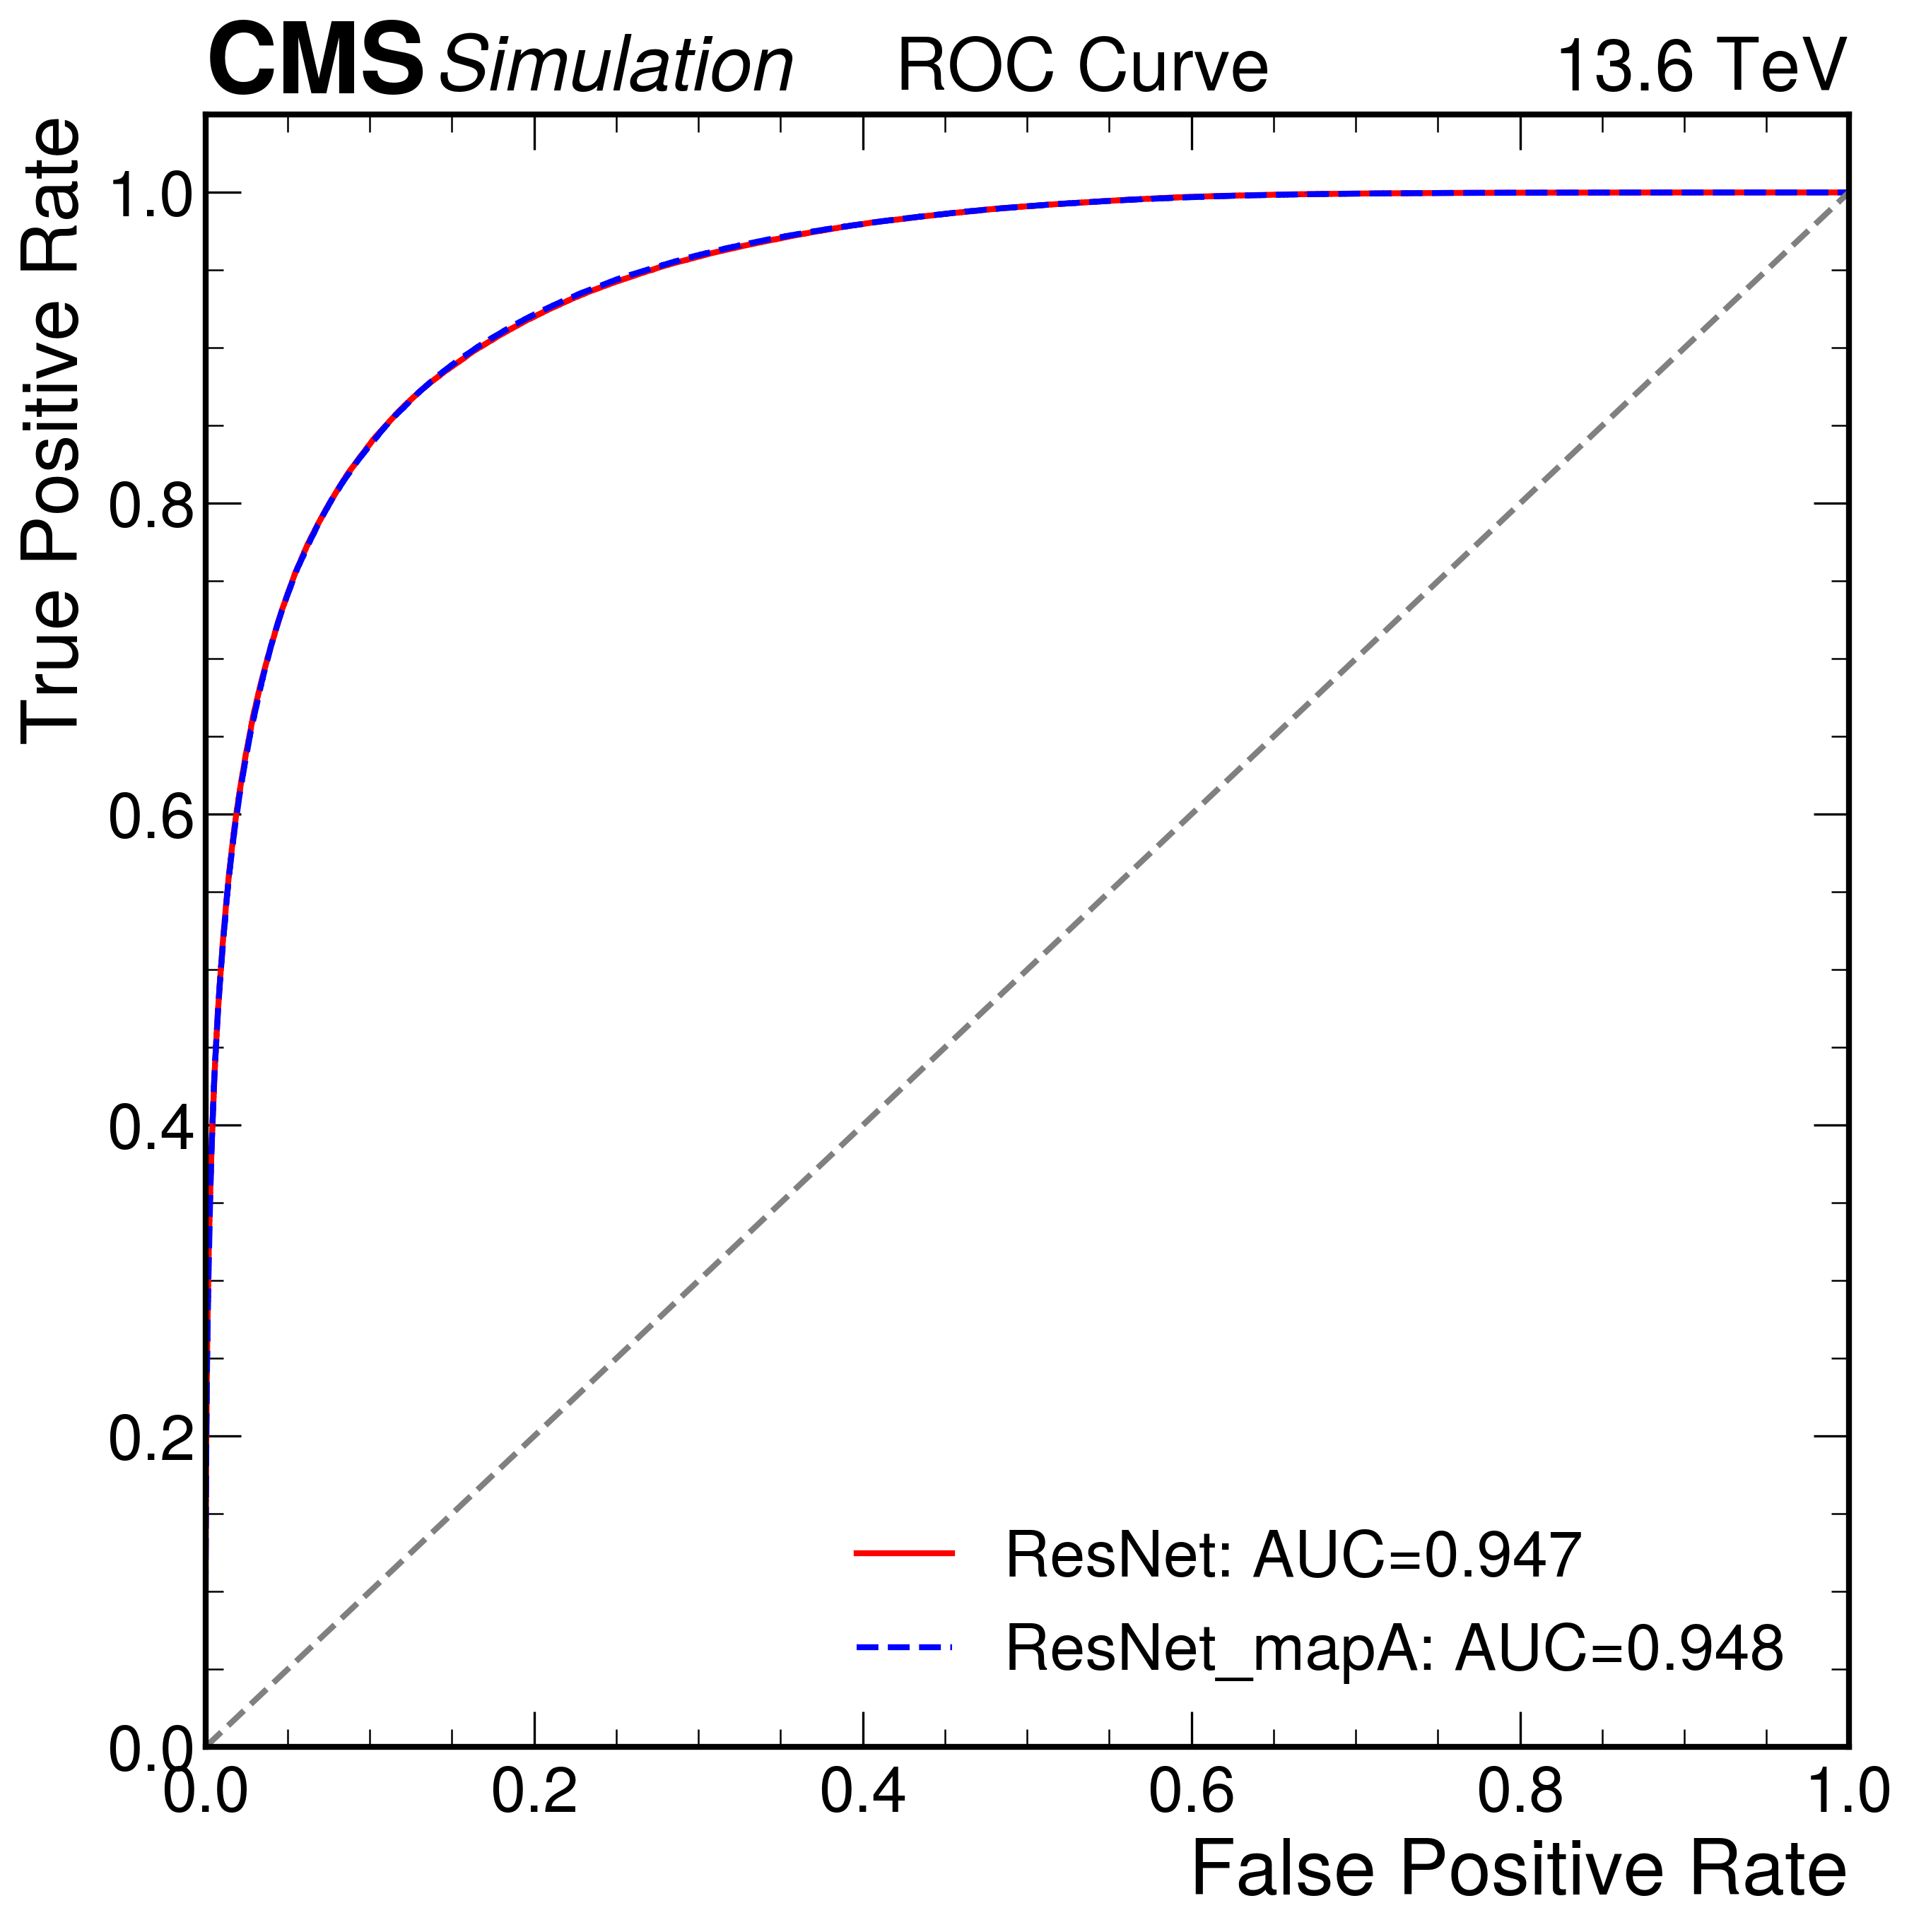

In [16]:
epoch=30

data_dir ='../analysis_run3/Data_for_plots/classification/ResNet_classifier'
model_dir = '13_ch_classifier_ResNet'
model_dir_map ='13_ch_classifier_ResNet_mapA'


data_file = glob.glob(f"{data_dir}/{model_dir}/INFERENCE_DATA/epoch{epoch}*_inference_data.pkl")[0]
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
fpr = data['fpr'] 
tpr = data['tpr']



data_file_map = glob.glob(f"{data_dir}/{model_dir_map}/INFERENCE_DATA/epoch{epoch}*_inference_data.pkl")[0]
infile_map = open(f"{data_file_map}", "rb")
data_map = pickle.load(infile_map)
fpr_map = data_map['fpr'] 
tpr_map = data_map['tpr']


fig, ax = plt.subplots(dpi=300)
plt.plot(fpr, tpr, color='red', lw=2, label=f'ResNet: AUC={np.round(auc(fpr, tpr),3)}')
plt.plot(fpr_map, tpr_map, color='blue',linestyle='--', lw=2, label=f'ResNet_mapA: AUC={np.round(auc(fpr_map, tpr_map),3)}')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
hep.cms.label(llabel="Simulation ", rlabel="ROC Curve         " + "     13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'{out_dir}/roc_curve_resnet_and_resnet_mapA_model.pdf', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()
    

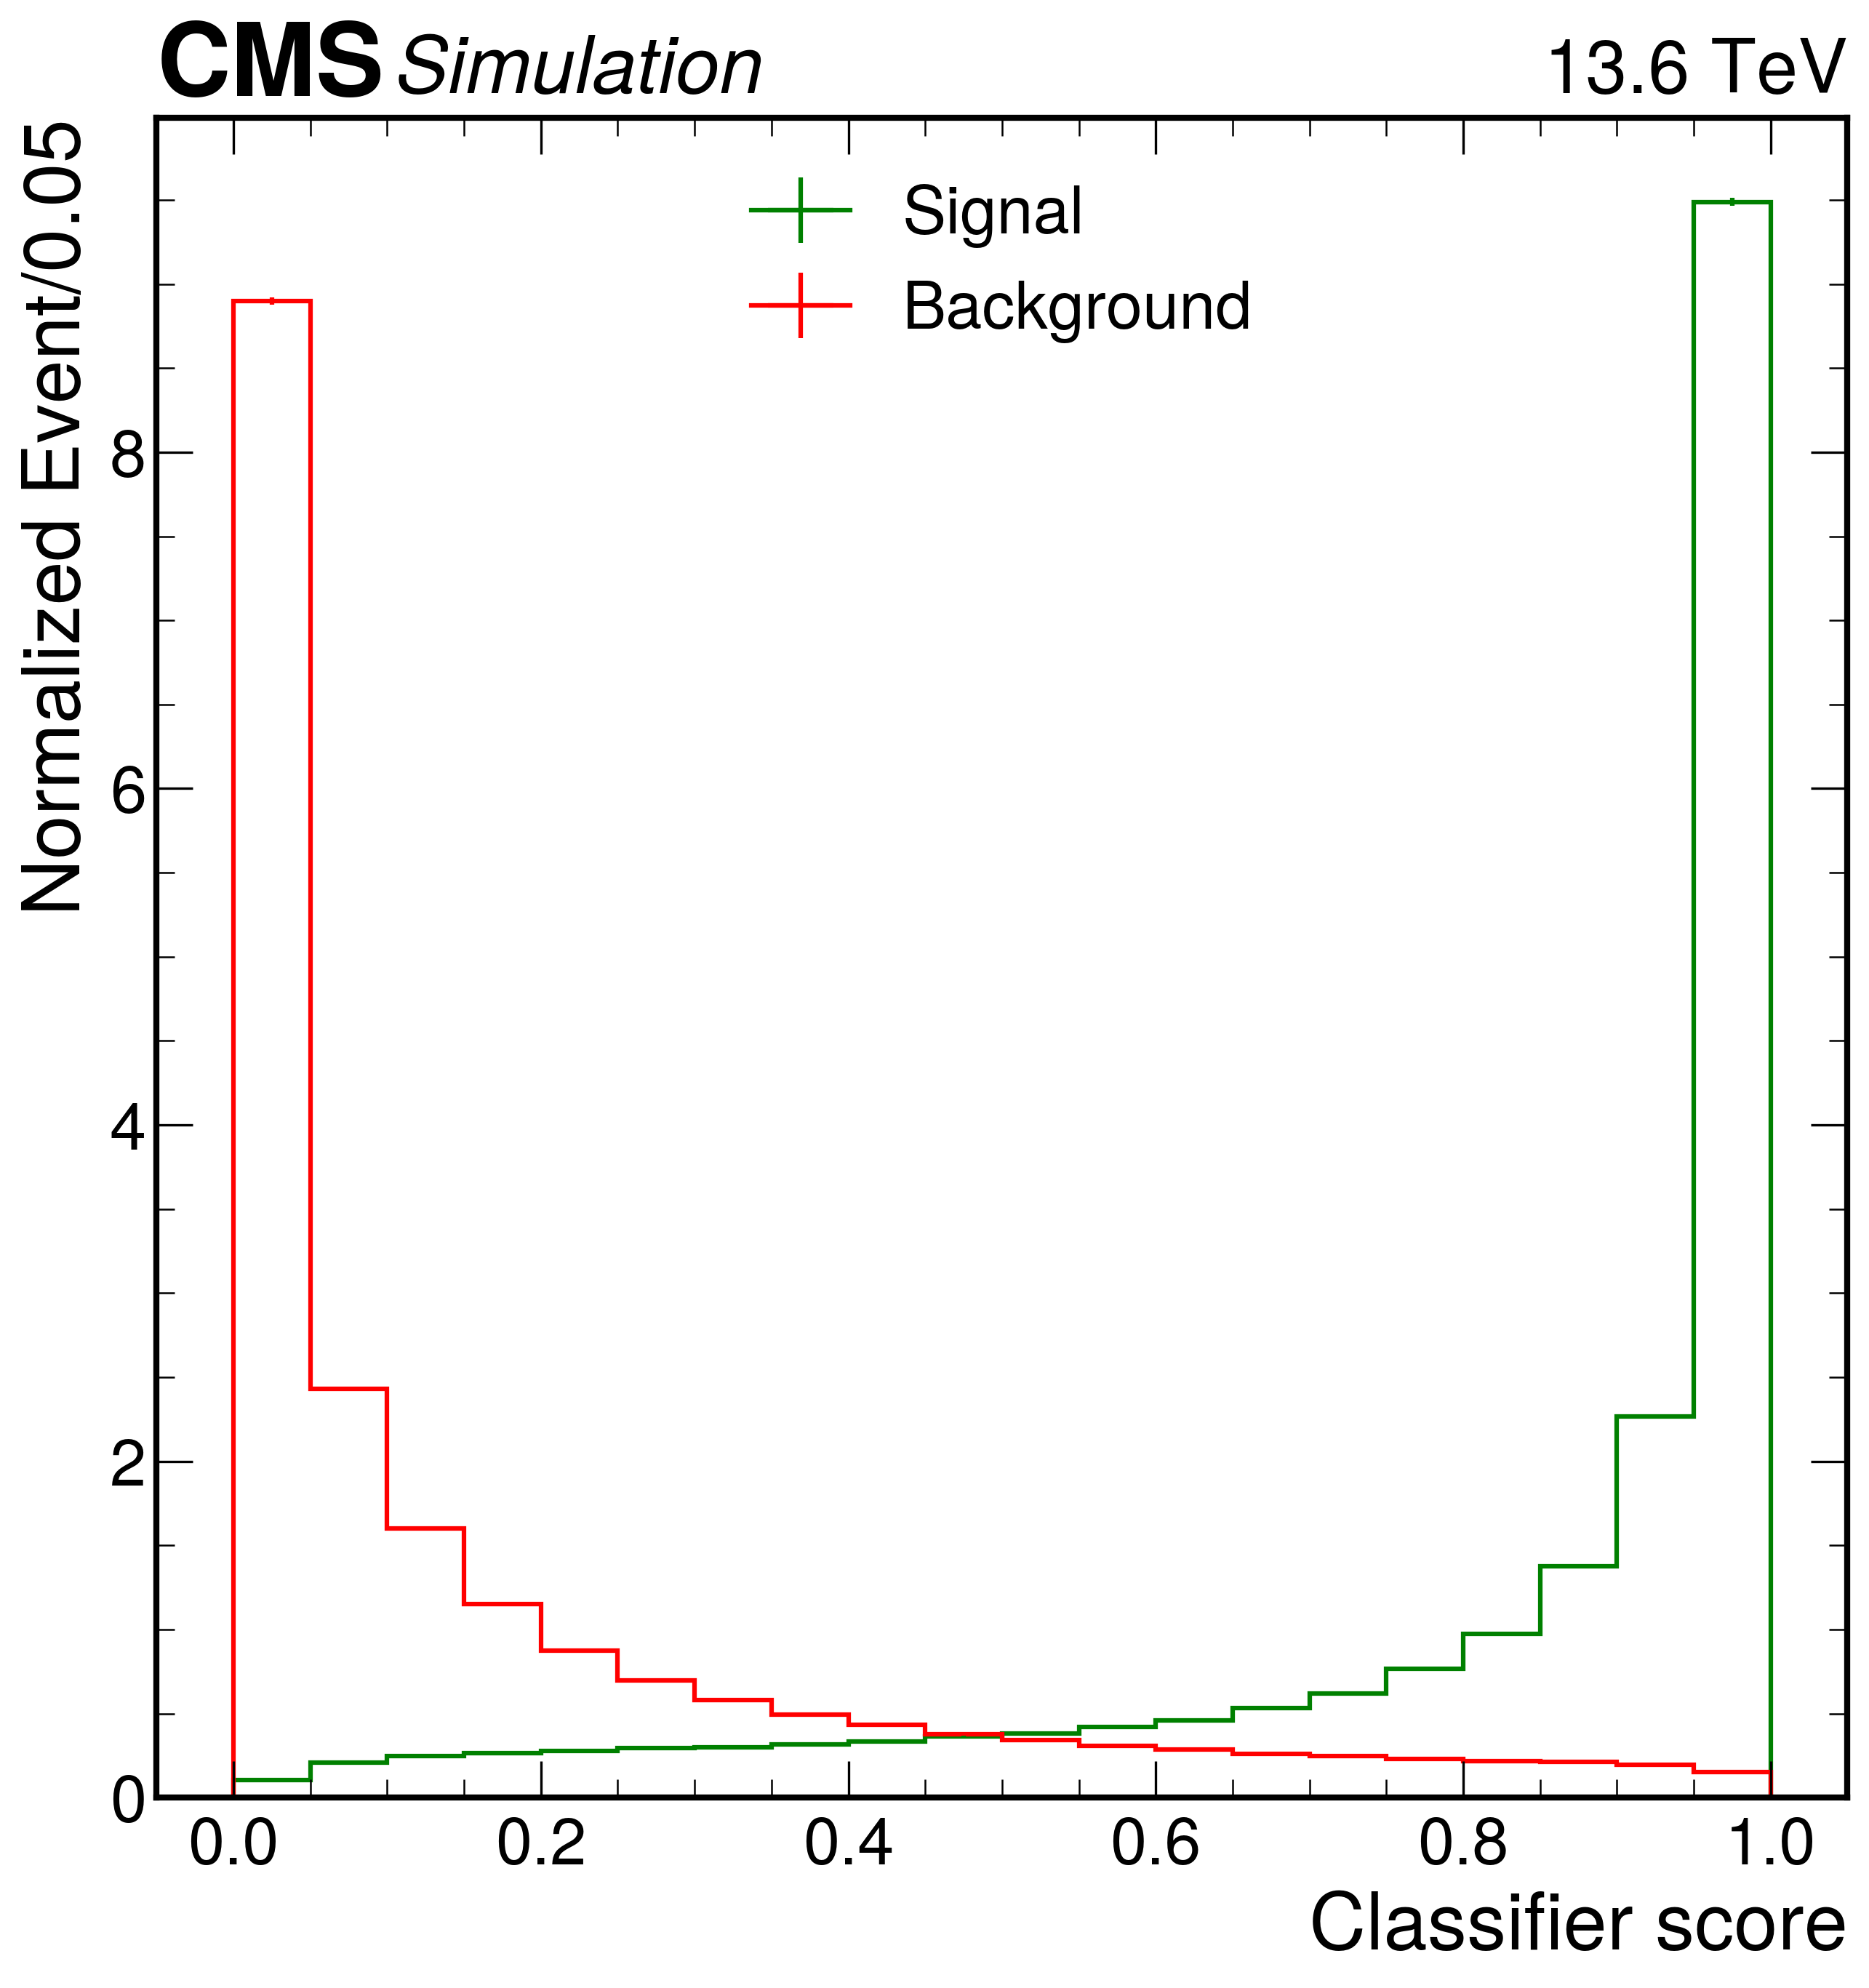

In [74]:
sig , back = [], []
bins = np.arange(0,1.01,0.05)
data_file_map = glob.glob(f"{data_dir}/{model_dir_map}/INFERENCE_DATA/epoch{epoch}*_inference_data.pkl")[0]
infile_map = open(f"{data_file_map}", "rb")
data_map = pickle.load(infile_map)
y_pred = data_map['y_pred'].flatten()
y_true = data_map['y_true'].flatten()

for i in range(len(y_true)):
    if y_true[i]==1: 
        sig.append(y_pred[i])
    else:
        back.append(y_pred[i])
fig, ax = plt.subplots(dpi=300)

h1_counts, h1_bins = np.histogram(sig, bins=bins)
hep.histplot(h1_counts, h1_bins, histtype='step', yerr=True,
             label='Signal', linestyle='-', color='g', density=True)

h2_counts, h2_bins = np.histogram(back, bins=bins)
hep.histplot(h2_counts, h2_bins, histtype='step', yerr=True,
             label='Background', linestyle='-', color='r', density=True)

plt.xlabel('Classifier score')
plt.ylabel('Normalized Event/0.05')
plt.legend(loc='best')
hep.cms.label(llabel="Simulation ", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'{out_dir}/classifier_score_for_resnet_mapA_model.pdf', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

Accuracy: 87.06%
Precision: 87.55%
Recall: 86.42%
F1 Score: 86.98%
Confusion Matrix:
[[316546  44418]
 [ 49094 312342]]


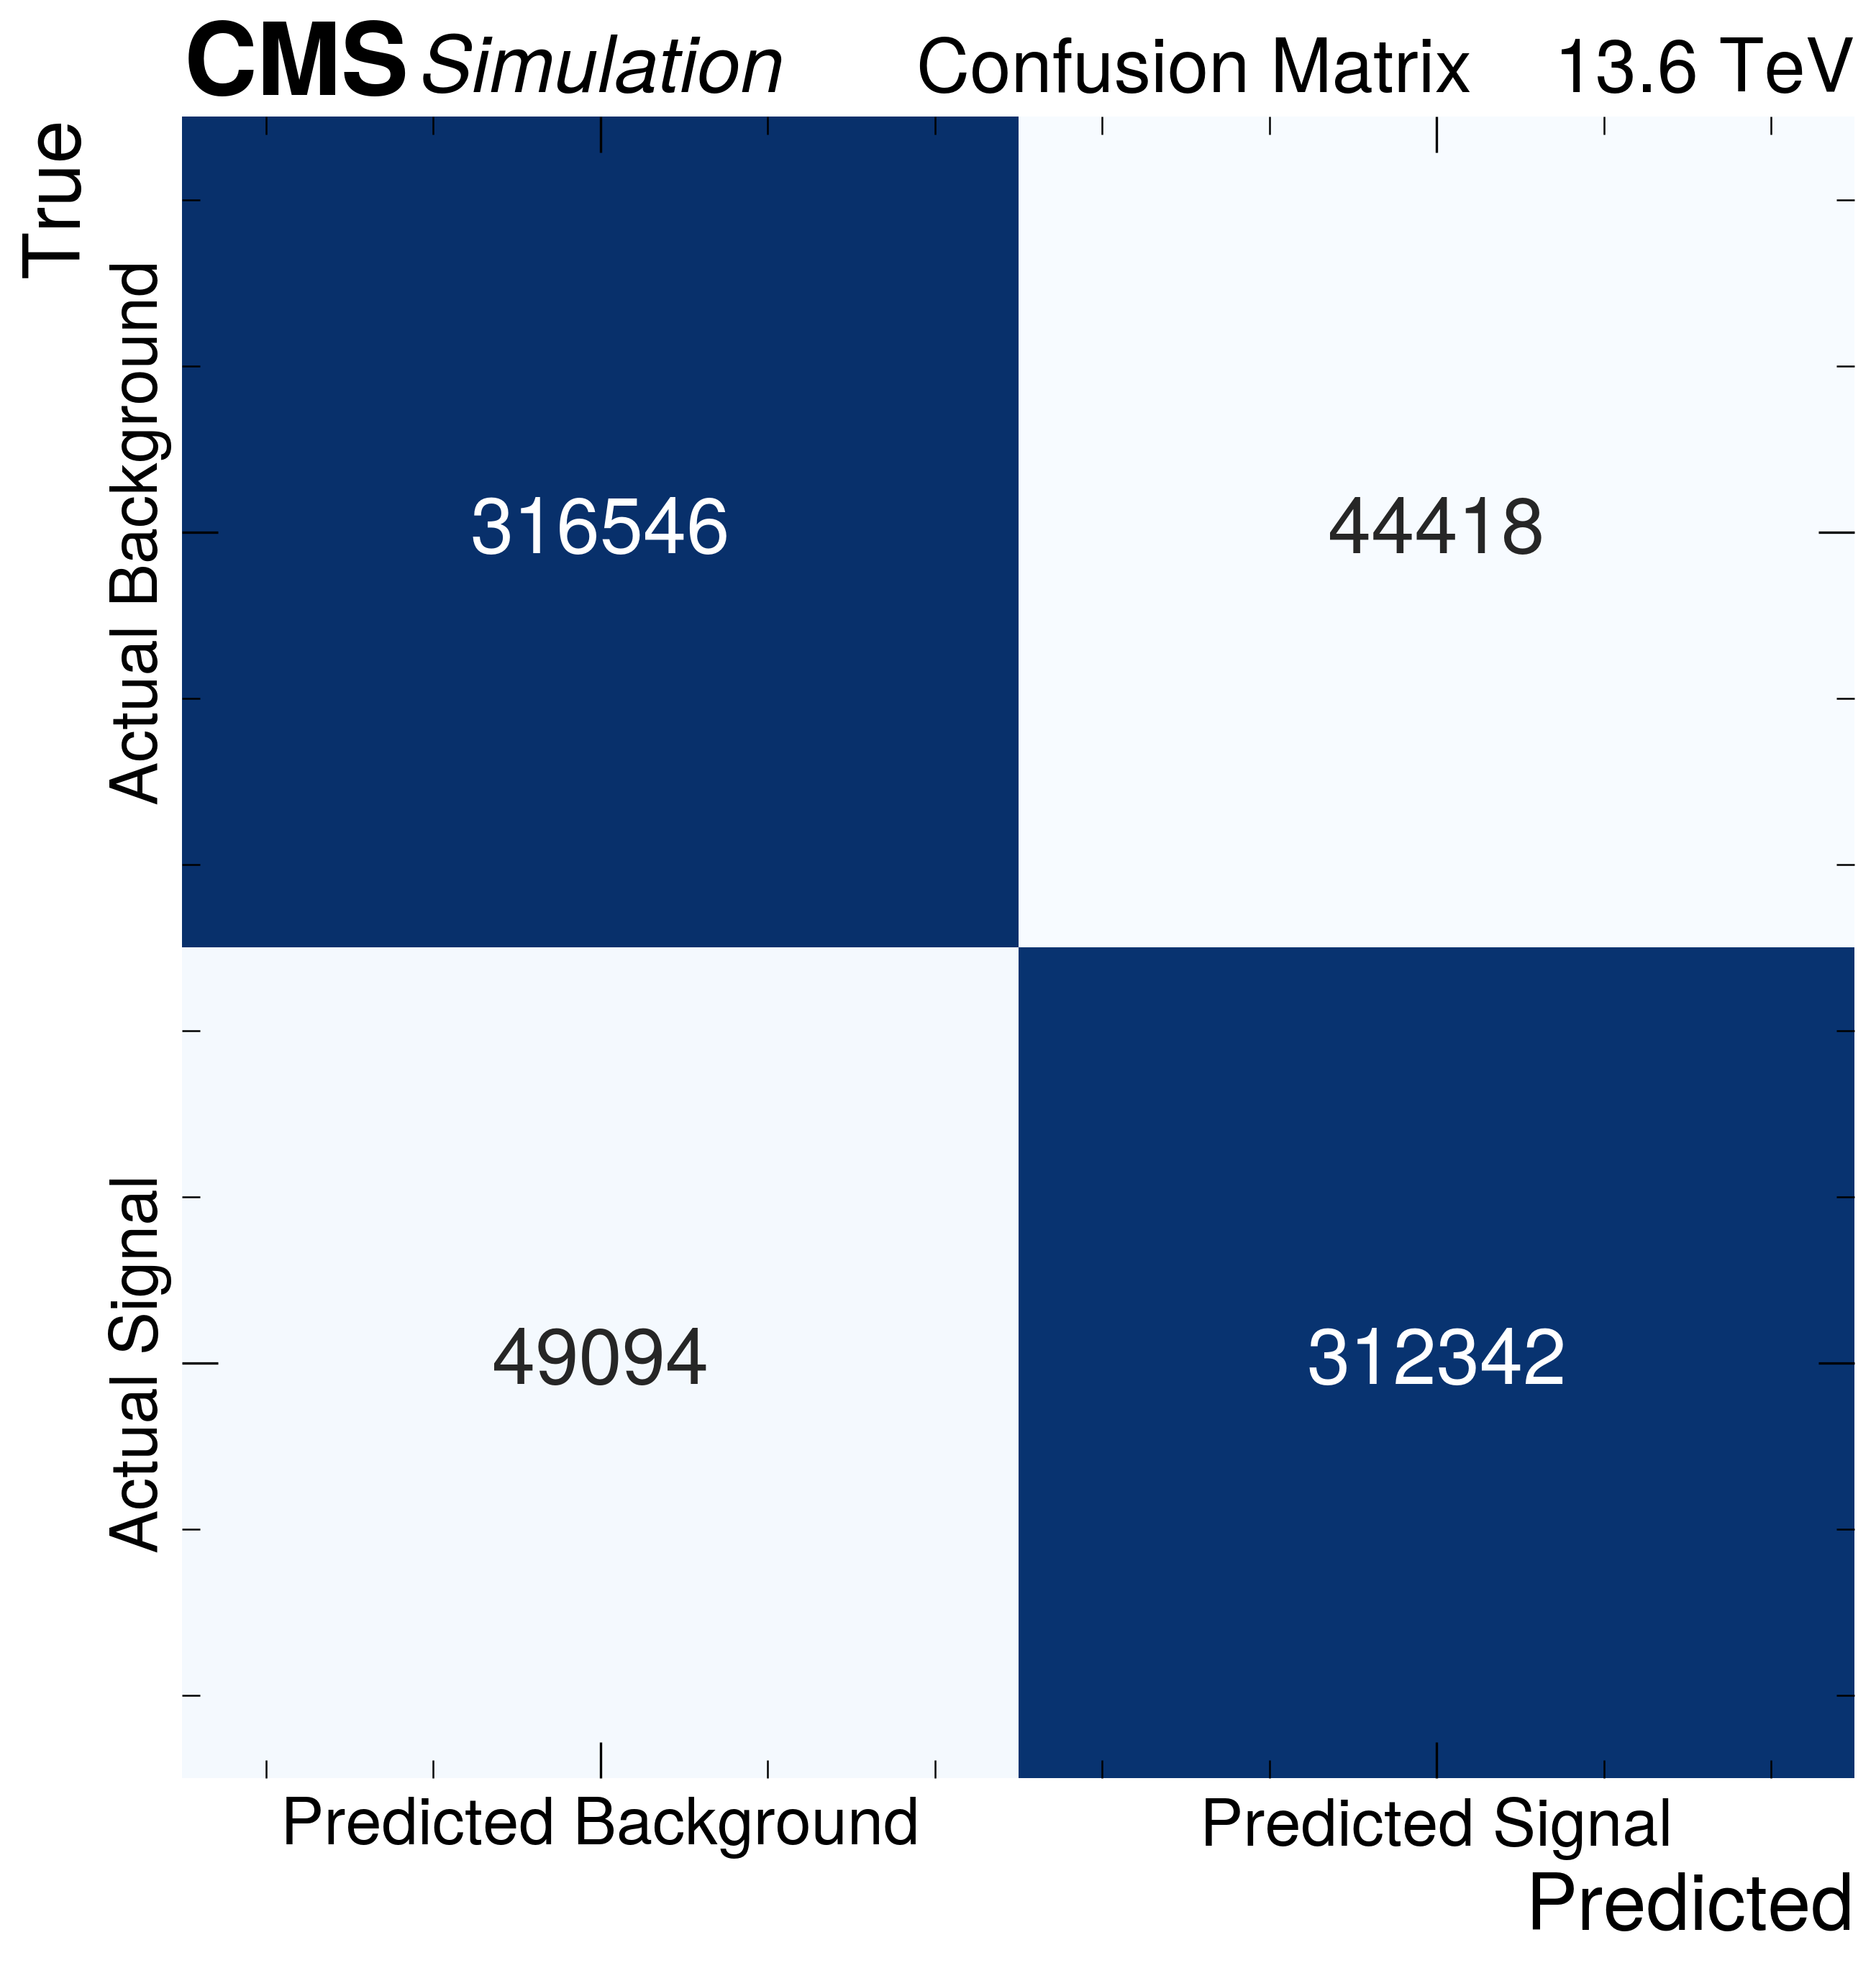

In [75]:
data_file_map = glob.glob(f"{data_dir}/{model_dir_map}/INFERENCE_DATA/epoch{epoch}*_inference_data.pkl")[0] 
infile_map = open(f"{data_file_map}", "rb") 
data_map = pickle.load(infile_map) 
fpr = data_map['fpr'].flatten() 
tpr = data_map['tpr'].flatten() 
y_pred = data_map['y_pred'].flatten() 
y_true = data_map['y_true'].flatten()
# Convert probabilities to binary predictions
y_pred_binary = (y_pred >= 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_binary)
print(f"Accuracy: {accuracy:.2%}")

# Calculate precision
precision = precision_score(y_true, y_pred_binary)
print(f"Precision: {precision:.2%}")

# Calculate recall
recall = recall_score(y_true, y_pred_binary)
print(f"Recall: {recall:.2%}")

# Calculate F1 score
f1 = f1_score(y_true, y_pred_binary)
print(f"F1 Score: {f1:.2%}")

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)
fig, ax = plt.subplots(dpi=300)
# Plot confusion matrix heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Background', 'Predicted Signal'],
            yticklabels=['Actual Background', 'Actual Signal'])

plt.ylabel('True')
plt.xlabel('Predicted')
hep.cms.label(llabel="Simulation ", rlabel="Confusion Matrix  "+"  13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'{out_dir}/confusion_matrix_for_resnet_mapA_model.pdf', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()


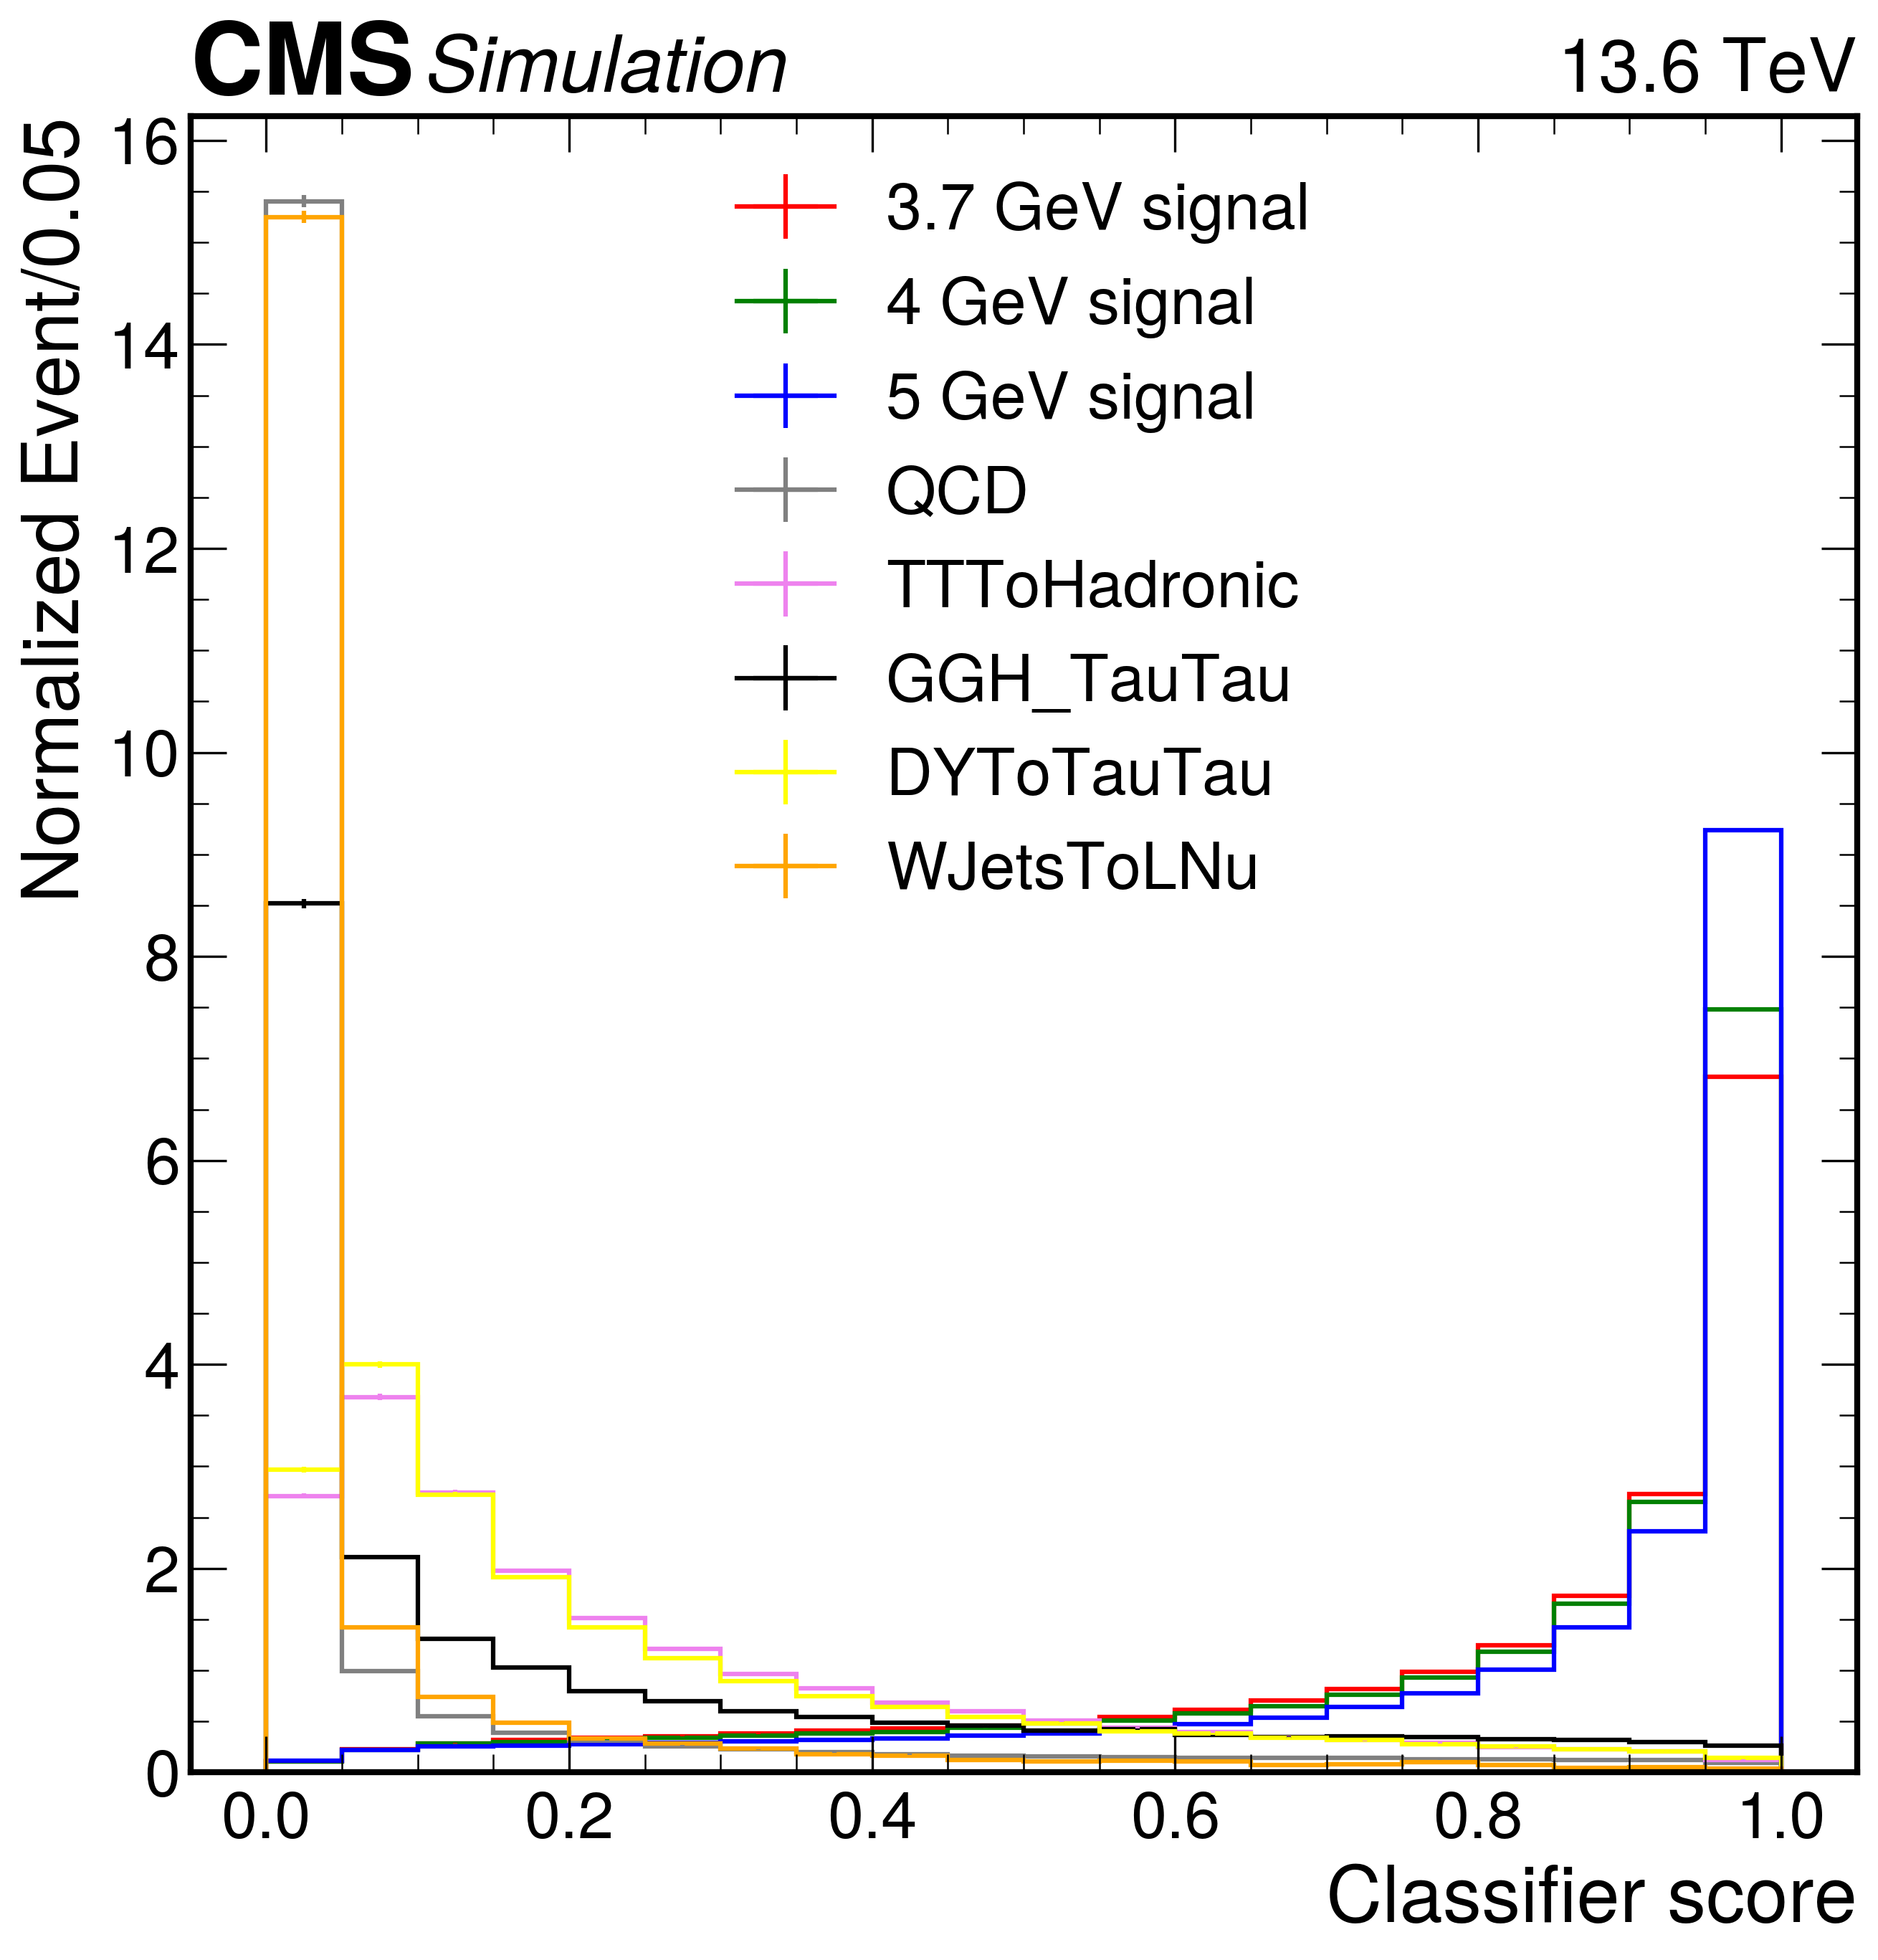

In [86]:
bins = np.arange(0,1.01,0.05)

input_datasets = [
    'IMG_H_AATo4Tau_Hadronic_tauDR0p4_M3p7_signal_v2_2.pkl',
    'IMG_H_AATo4Tau_Hadronic_tauDR0p4_M4_signal_v2_2.pkl',
    'IMG_H_AATo4Tau_Hadronic_tauDR0p4_M5_signal_v2_2.pkl',
    'QCD_Pt-15to7000_valid.pkl',
    'DYToTauTau_M-50_13TeV_valid.pkl',
    'TTToHadronic_valid.pkl',
    'GGH_TauTau_valid.pkl',
    'WJetsToLNu_valid.pkl'
]

tag = [
    
    '3.7 GeV signal',
    '4 GeV signal',
    '5 GeV signal',
    'QCD',
    'TTToHadronic',
    'GGH_TauTau',
    'DYToTauTau',
    'WJetsToLNu'
]
colors =['r', 'green', 'blue', 'grey', 'violet','black', 'yellow', 'orange']
fig, ax = plt.subplots(dpi=300)
for i, input_dataset in enumerate(input_datasets):
    data_file_map = glob.glob(f"{data_dir}/{model_dir_map}/{input_dataset}")[0]
    # print(tag[i], data_file_map)

    infile_map = open(f"{data_file_map}", "rb") 
    data_map = pickle.load(infile_map) 
    y_pred = data_map['y_pred'].flatten() 
    y_true = data_map['y_true'].flatten()
    h1_counts, h1_bins = np.histogram(y_pred, bins=bins)
    hep.histplot(h1_counts, h1_bins, histtype='step', yerr=True,
                 label=f'{tag[i]}', linestyle='-', color=colors[i], density=True)
    
plt.xlabel('Classifier score')
plt.ylabel('Normalized Event/0.05')
plt.legend(loc='best')
hep.cms.label(llabel="Simulation ", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'{out_dir}/classifier_score_for_resnet_mapA_model_for_all_back_and_signal.pdf', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

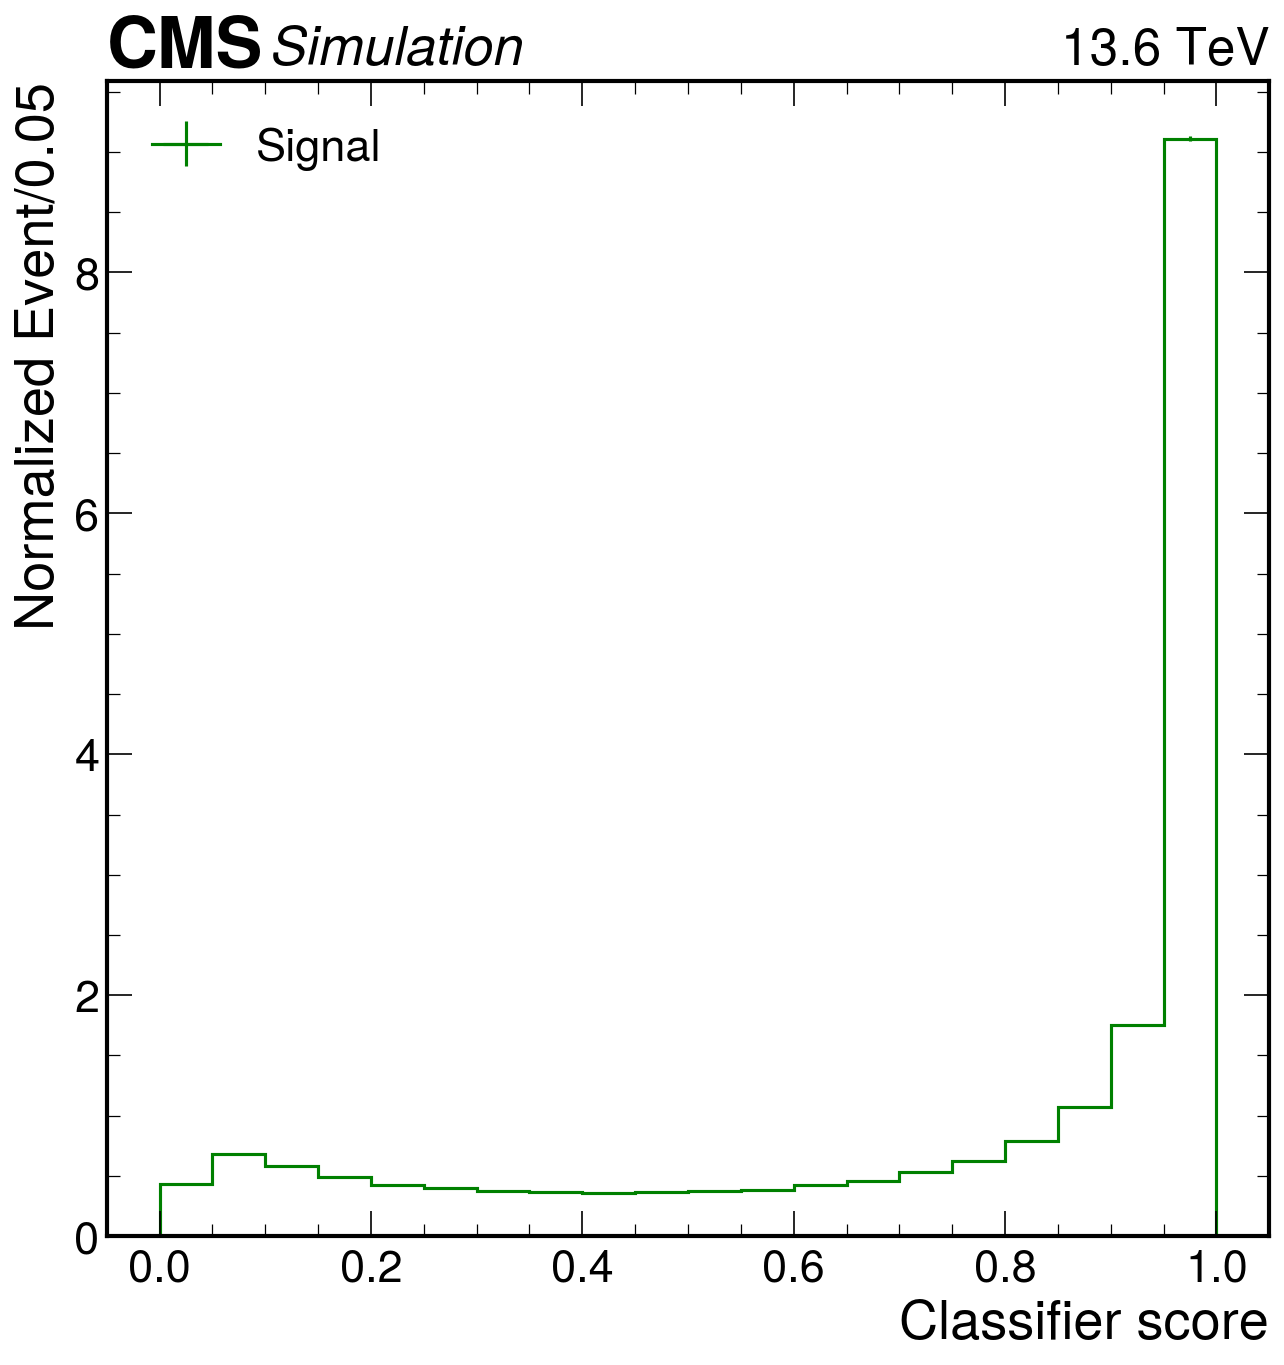

In [18]:
epoch=30

data_dir ='../analysis_run3/Data_for_plots/classification/ResNet_classifier'
# model_dir = '13_ch_classifier_ResNet'
model_dir_map ='13_ch_classifier_ResNet_mapA'


bins = np.arange(0,1.01,0.05)
data_file_map = glob.glob(f"{data_dir}/{model_dir_map}/IMG_aToTauTau_Hadronic_tauDR0p4_m3p6To14p8_dataset_2_unbaised_v2_0009_train.pkl")[0]
infile_map = open(f"{data_file_map}", "rb")
data_map = pickle.load(infile_map)
y_pred = data_map['y_pred'].flatten()


h1_counts, h1_bins = np.histogram(y_pred, bins=bins)

fig, ax = plt.subplots(dpi=150)
hep.histplot(h1_counts, h1_bins, histtype='step', yerr=True,
             label='Signal', linestyle='-', color='g', density=True)


plt.xlabel('Classifier score')
plt.ylabel('Normalized Event/0.05')
plt.legend(loc='best')
hep.cms.label(llabel="Simulation ", rlabel="13.6 TeV", loc=0, ax=ax)
`plt.savefig(f'{out_dir}/classifier_score_for_resnet_mapA_model_on_mass_regression_sample.pdf', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

